In [1]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [2]:
# read the dataset and extract the features and target separately
df_train = pd.read_csv("train.csv")
df_train.head()

,Id,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
0,17221,F. Burdenski,25,Germany,54,58,Korona Kielce,0.07,0.001,CDM
1,11353,A. Deiola,21,Italy,64,73,Cagliari,0.70,0.010,CM
2,3402,T. Castagne,21,Belgium,72,79,Atalanta,3.70,0.013,RB
3,16071,D. Gorman,21,Northern Ireland,57,66,Stevenage,0.16,0.002,CM
4,12380,N. Molina Lucero,19,Argentina,63,75,Boca Juniors,0.55,0.002,LB


In [3]:
df_train.isnull().sum()

Id               0
Name             0
Age              0
Nationality      0
Overall          0
Potential        0
Club           211
Value (M)        0
Wage (M)         0
Position         0
dtype: int64

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features

In [4]:
categorical_var = df_train.select_dtypes(include = 'object')
categorical_var

df_train.drop(["Name","Nationality","Club","Position"],axis = 1, inplace = True)

In [5]:
df_train.head()

,Id,Age,Overall,Potential,Value (M),Wage (M)
0,17221,25,54,58,0.07,0.001
1,11353,21,64,73,0.70,0.010
2,3402,21,72,79,3.70,0.013
3,16071,21,57,66,0.16,0.002
4,12380,19,63,75,0.55,0.002


In [6]:
# Code Starts here
numerical_var = df_train.select_dtypes(include = 'number')
numerical_var
# Code ends here

,Id,Age,Overall,Potential,Value (M),Wage (M)
0,17221,25,54,58,0.070,0.001
1,11353,21,64,73,0.700,0.010
2,3402,21,72,79,3.700,0.013
3,16071,21,57,66,0.160,0.002
4,12380,19,63,75,0.550,0.002
...,...,...,...,...,...,...
14379,7243,25,68,69,1.100,0.022
14380,8527,25,67,70,0.950,0.007
14381,4714,25,71,76,0.000,0.000
14382,10196,24,65,70,0.525,0.002


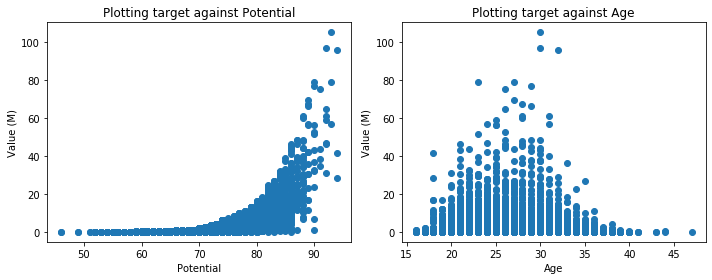

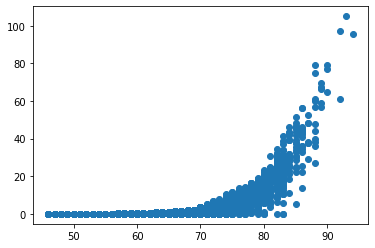

In [7]:
numerical = ["Potential","Age","Overall"]
for i in range(0,len(numerical),2):
    if len(numerical) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        plt.scatter(df_train[numerical[i]],df_train["Value (M)"])
        plt.title('Plotting target against '+numerical[i])
        plt.xlabel(numerical[i])
        plt.ylabel("Value (M)")
        
        
        plt.subplot(122)
        plt.scatter(df_train[numerical[i+1]],df_train["Value (M)"])
        plt.title('Plotting target against '+numerical[i+1])
        plt.xlabel(numerical[i+1])
        plt.ylabel("Value (M)")
        plt.tight_layout()
        plt.show()
    else:
         plt.scatter(df_train[numerical[i]],df_train["Value (M)"])

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Value (M)`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. You can use higher degree [Polynomial Features of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to improve the model prediction. 



In [8]:
df_train.columns

Index(['Id', 'Age', 'Overall', 'Potential', 'Value (M)', 'Wage (M)'], dtype='object')

In [9]:
# Code Starts here
X = df_train[['Id', 'Age', 'Overall', 'Potential', 'Wage (M)']]
y = df_train["Value (M)"]

X_train,X_val,y_train,y_val = train_test_split(X, y, test_size = 0.3,random_state = 6)

print(X_train.shape)
print(y_train.shape)
# Code ends here

(10068, 5)
(10068,)


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14384 entries, 0 to 14383
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         14384 non-null  int64  
 1   Age        14384 non-null  int64  
 2   Overall    14384 non-null  int64  
 3   Potential  14384 non-null  int64  
 4   Value (M)  14384 non-null  float64
 5   Wage (M)   14384 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 674.4 KB


In [29]:
regressor = LinearRegression()

regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_val)
y_pred

array([ 1.22630803,  2.48172582, -1.05388527, ...,  1.12725994,
        1.65126175,  2.01239771])

In [12]:
#Calculate R^2
r2 = r2_score(y_val,y_pred)
r2

0.7923578038347576

In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

regressor.fit(X_train_poly, y_train)
y_pred_poly = regressor.predict(X_val_poly)

r2 = r2_score(y_val,y_pred_poly)
r2

0.9592632178542835

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [31]:
df_test = pd.read_csv("test.csv")


In [23]:
df_test.shape
df_test.columns

Index(['Id', 'Age', 'Overall', 'Potential', 'Wage (M)'], dtype='object')

In [32]:
# Code Starts here
df_test.drop(["Name","Nationality","Club","Position"],axis = 1, inplace = True)
# Code ends here

In [34]:
id = df_test["Id"]


In [33]:
y_pred_df_test = regressor.predict(df_test)
y_pred_df_test

array([12.65384644, 19.7845183 ,  2.64925318, ...,  0.77871298,
       13.38363925,  5.55373984])

In [41]:
poly1 = PolynomialFeatures(2)
df_test_poly1 = poly1.fit_transform(df_test)
#df_test_poly = poly.transform(df_test)


In [43]:

#regressor.fit(df_test_poly1, y_train)
y_pred_poly = regressor.predict(df_test_poly)
y_pred_poly

array([19.27652031, 18.48601298,  1.64697968, ...,  0.86386543,
        9.62933386,  4.20976707])

In [45]:
final_sub = pd.DataFrame({"Id": id, "Value (M)": y_pred_poly})
#final_sub

In [46]:
final_sub.to_csv("FIFA_Submission.csv", index=False)